# Segmentation d'image avec python

La segmentation d'image est une étape importante du traitement d'image, et elle apparaît partout si nous voulons analyser ce qu'il y a à l'intérieur de l'image. Par exemple, si nous cherchons à trouver s'il y a une chaise ou une personne à l'intérieur d'une image d'intérieur, nous pouvons avoir besoin d'une segmentation d'image pour séparer les objets et analyser chaque objet individuellement pour vérifier ce que c'est. La segmentation d'image sert généralement de prétraitement avant la reconnaissance de formes, l'extraction de caractéristiques et la compression de l'image.

La segmentation d'image est la classification d'une image en différents groupes. De nombreux types de recherche ont été effectués dans le domaine de la segmentation d'images à l'aide du clustering. Il existe différentes méthodes et l'une des méthodes les plus populaires est l'algorithme de clustering K-Means.

# Pourquoi faire de la segmentation d'images ?

La segmentation d'image est généralement utilisée pour localiser des objets et des limites (lignes, courbes, etc.) dans les images. Plus précisément, la segmentation d'image est le processus d'attribution d'une étiquette à chaque pixel d'une image de telle sorte que les pixels avec la même étiquette partagent certaines caractéristiques.

Bien sûr, une question commune se pose:

Pourquoi la segmentation d'image est-elle même importante?

Si nous prenons l'exemple des véhicules autonomes, ils ont besoin de dispositifs d'entrée sensoriels tels que des caméras, des radars et des lasers pour permettre à la voiture de percevoir le monde qui l'entoure, créant ainsi une carte numérique. La conduite autonome n'est même pas possible sans détection d'objet qui elle-même implique une classification / segmentation d'image.

# Dans le domaine médical

D'autres exemples concernent le domaine médical où si nous parlons de cancer, même à l'ère des progrès technologiques d'aujourd'hui, le cancer peut être mortel si nous ne l'identifions pas à un stade précoce. La détection des cellules cancéreuses aussi rapidement que possible peut potentiellement sauver des millions de vies. La forme des cellules cancéreuses joue un rôle essentiel dans la détermination de la gravité du cancer qui peut être identifiée à l'aide d'algorithmes de classification d'images.

# Algorithme des k-Moyennes

L'algorithme de Segmentation K-Moyennes est un algorithme non supervisé et il est utilisé pour segmenter la zone d'intérêt à partir de l'arrière-plan. Il regroupe ou partitionne les données données en K-clusters ou en parties basées sur les K-centroides.

## Importation des modules nécessaires

In [354]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from scipy.linalg import norm

## Dataset 1objet

D'abord, on va définir les chemins des datasets qu'on va utiliser pour faire la segmentation

In [355]:
folderpath = "Datasets/images/1objet"
labels_folderpath = "Datasets/verite_terrain/1objet"

La fonction `get_images_from_folder` nous permet de lire les différentes images contenues dans un dossier donné et de les convertir en des `arrays`

In [356]:
def get_images_from_folder(folderpath):
    list_image_names = os.listdir(folderpath)
    image_list = []
    for image_name in list_image_names:
        if image_name != "Thumbs.db":
            image = cv.imread(folderpath + "/" + image_name)
            image_list.append(image)
    return image_list

La fonction `segment_image_with_knn` nous permet d'appliquer la segmentation par k-Moyennes sur une image donnée.

In [357]:
def segment_image_with_knn(image, nclusters, attempts):
    image_array = image.reshape((-1, 3))
    # convert to np.float32
    image_array = np.float32(image_array) 
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
    # define number of clusters
    k = nclusters
    # define number of attempts
    attempts = attempts 
    # Now convert back into uint8, and make original image
    _,label,center=cv.kmeans(image_array, k, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS) 
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((image.shape))
    return res2

Maintenant, on va définir nos listes d'images.

In [358]:
image_list = get_images_from_folder(folderpath)
expected_images = get_images_from_folder(labels_folderpath)

On fixe les paramètres et on applique l'algorithme des K-Moyennes sur toutes les images présentes dans le dossier.

In [359]:
nclusters = 2
attempts = 10
segmented_images_list = [segment_image_with_knn(image, nclusters, attempts) for image in image_list]

La fonction `show_images` nous permet d'afficher les images segmentées en les comparant aux images originales et aux images attendues.

In [360]:
def show_images(image_list, segmented_images_list, expected_images):
    y = len(image_list)
    
    for item in range(y):
        plt.figure(figsize=(20,20))
        plt.subplot(1, 3, 1)
        plt.imshow(image_list[item], cmap='gray')
        plt.title("Original Image {}".format(item+1))
        plt.axis("off")
        plt.subplot(1, 3, 2)
        lower_bound = segmented_images_list[item].min()
        segmented_images_list[item] = np.where(segmented_images_list[item]==lower_bound, 0, 255)
        plt.imshow(segmented_images_list[item], cmap='gray')
        plt.title("Segmented Image {} with k = {}(black and white)".format(item+1, nclusters))
        plt.axis("off")
        plt.subplot(1, 3, 3)
        plt.imshow(expected_images[item], cmap='gray')
        plt.title("Expected Image {}".format(item+1))
        plt.axis("off")
        plt.show()

On visualize les résultats.

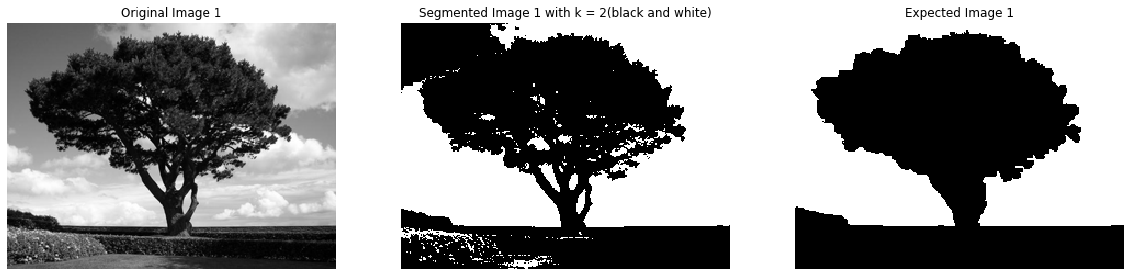

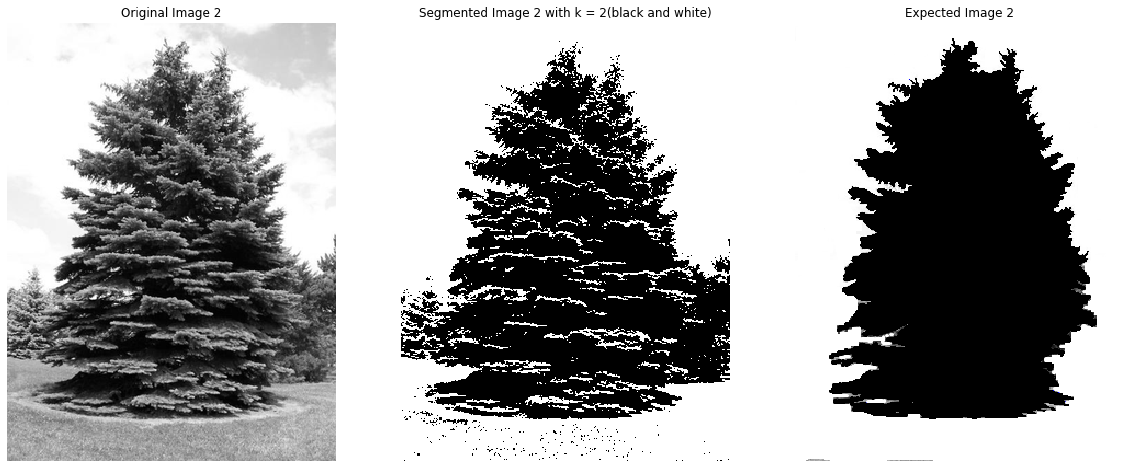

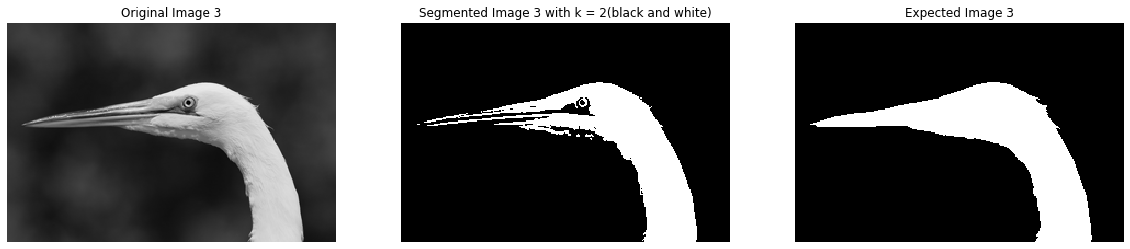

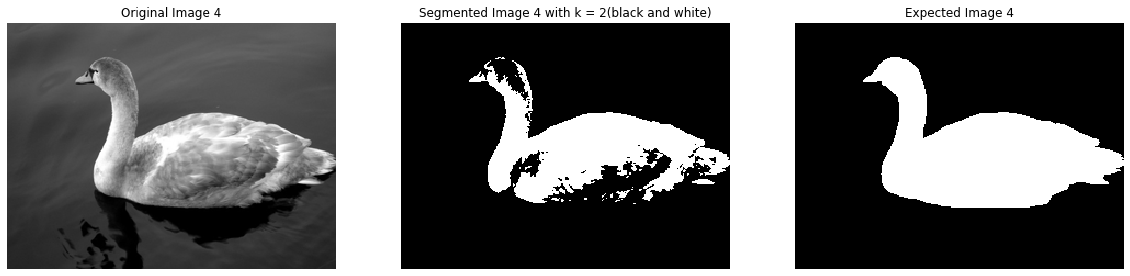

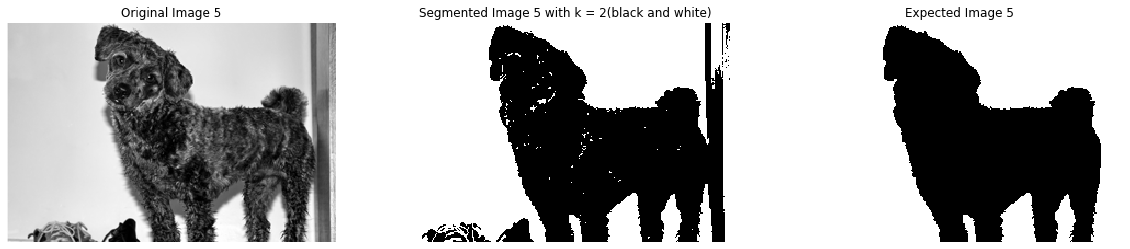

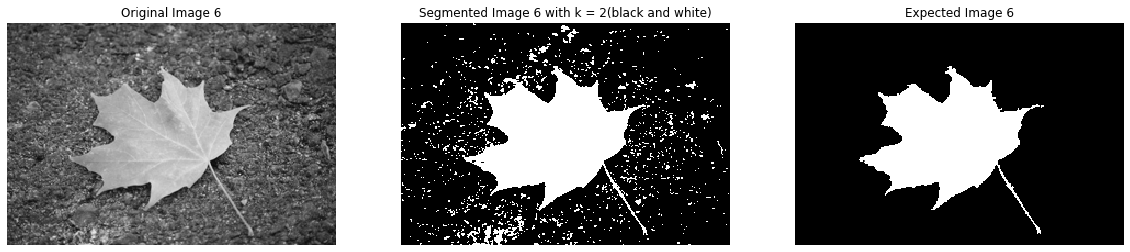

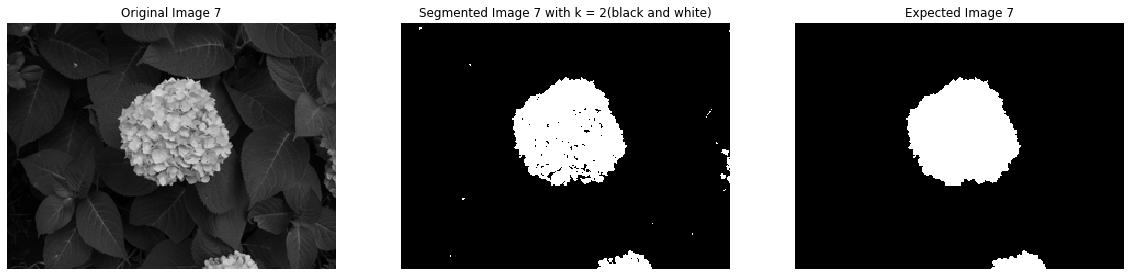

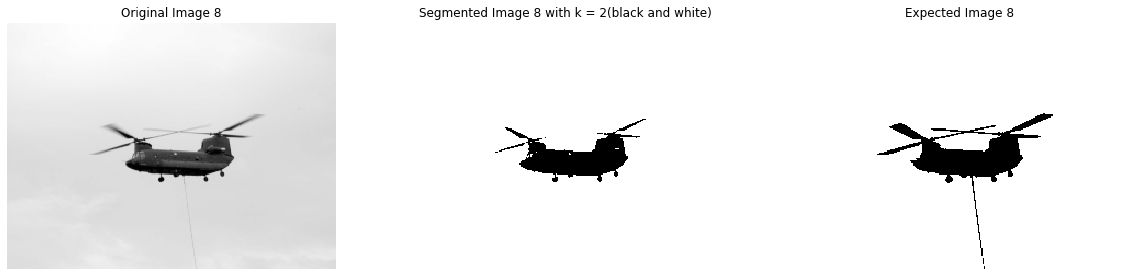

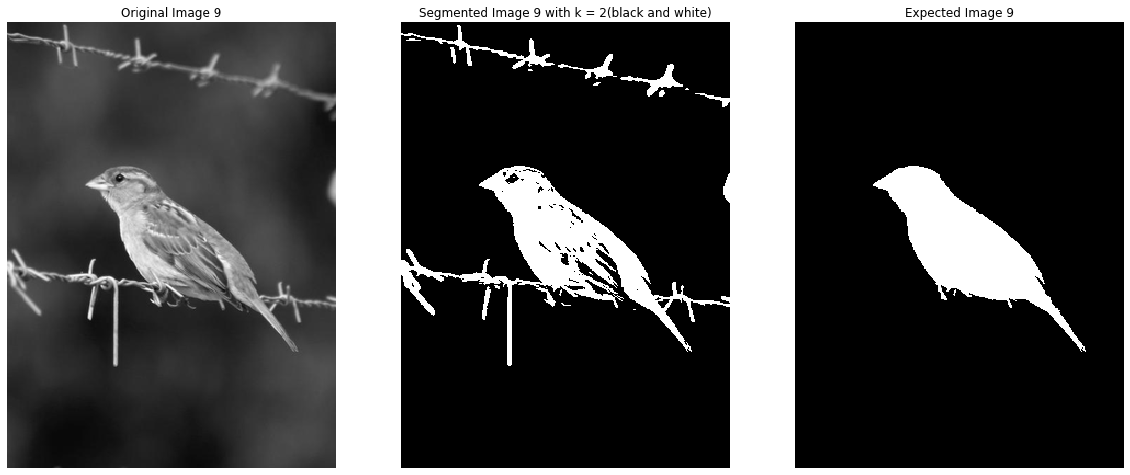

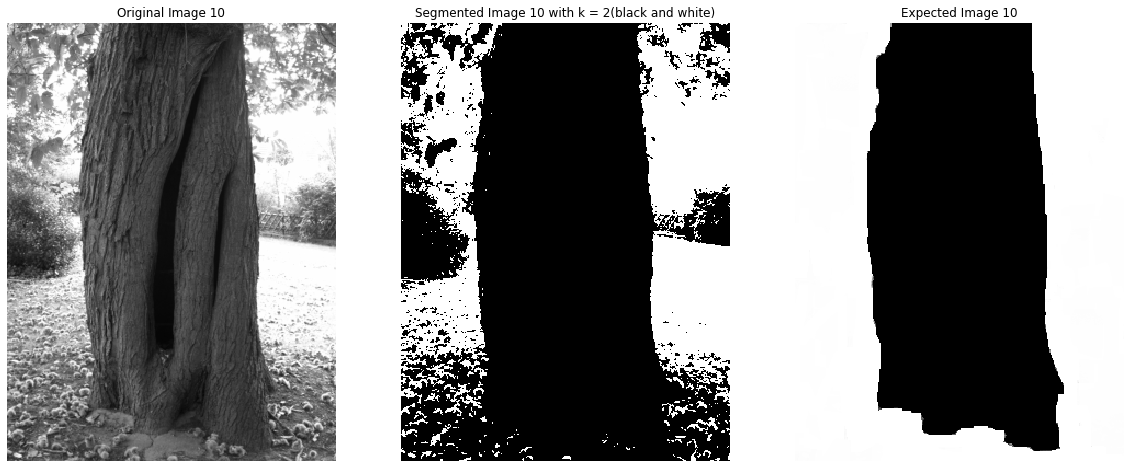

In [361]:
show_images(image_list, segmented_images_list, expected_images)

La fonction `get_accuracy` nous permet de calculer la précison de l'algorithme sur chaque image.

In [362]:
def get_accuracy(expected_images,predicted_images):
    acc = []
    for k in range(len(expected_images)): 
        try:
            l=[]
            for i in range(expected_images[k].shape[0]):
                for j in range(expected_images[k].shape[1]):      
                    l.append(expected_images[k][i][j] - predicted_images[k][i][j])
            errors = np.count_nonzero(l)
            current_accuracy = 1-(errors/len(l))
            acc.append(current_accuracy) 
            print("Accuracy of image segmentation", k+1, ": ", current_accuracy)
        except(IndexError):
            continue
    return sum(acc) / len(acc)

In [363]:
res = get_accuracy(segmented_images_list, expected_images)
print("Overall accuracy :" , res)

Accuracy of image segmentation 1 :  0.6836
Accuracy of image segmentation 2 :  0.4762666666666666
Accuracy of image segmentation 3 :  0.90945
Accuracy of image segmentation 4 :  0.7952444444444444
Accuracy of image segmentation 5 :  0.81035
Accuracy of image segmentation 6 :  0.838128078817734
Accuracy of image segmentation 7 :  0.9833777777777778
Accuracy of image segmentation 8 :  0.9597333333333333
Accuracy of image segmentation 9 :  0.875945945945946
Accuracy of image segmentation 10 :  0.015874999999999972
Overall accuracy : 0.7347971246985903


## Dataset 2objets

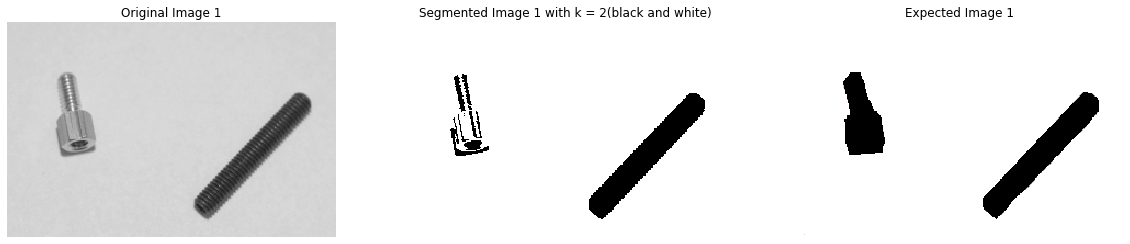

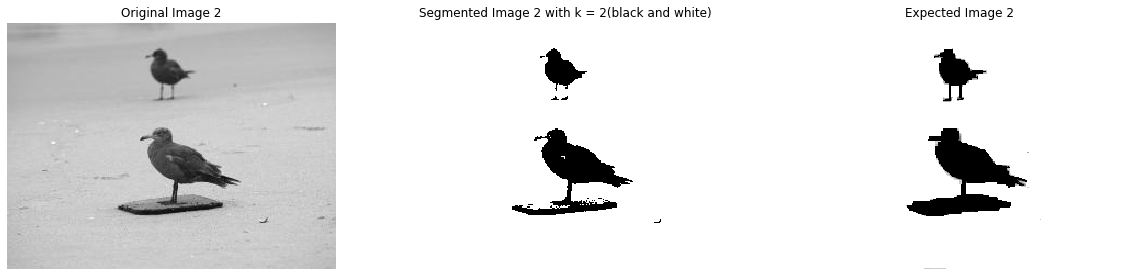

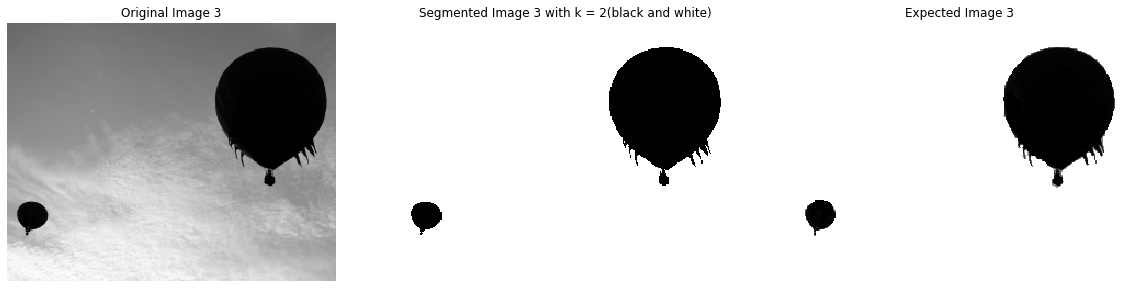

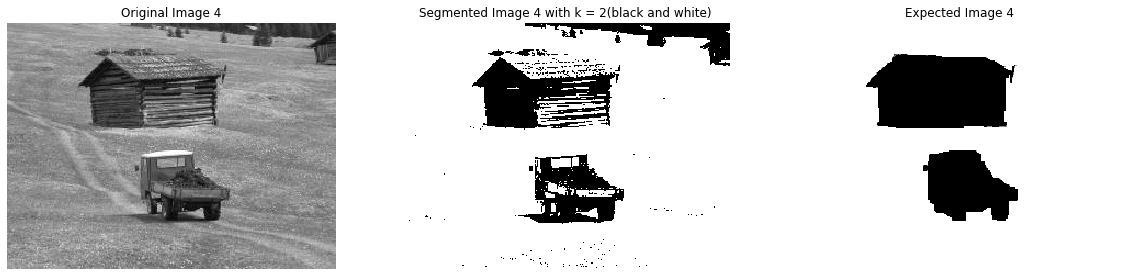

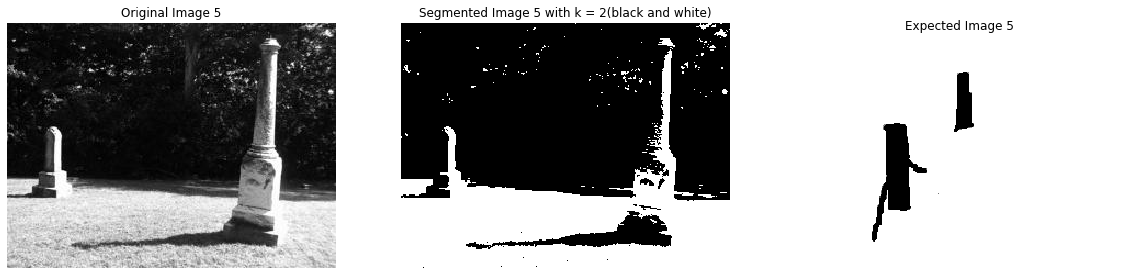

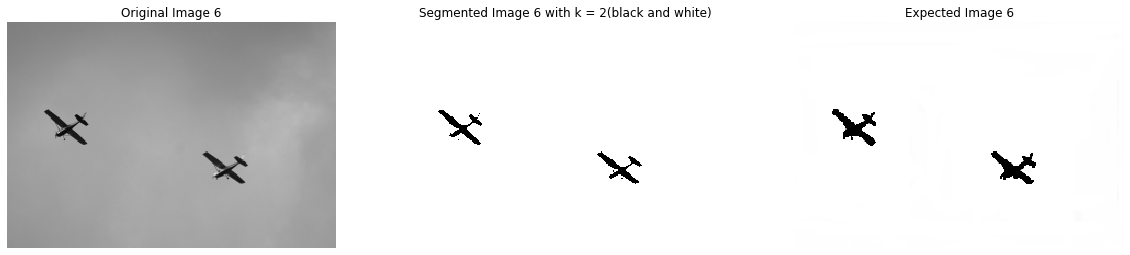

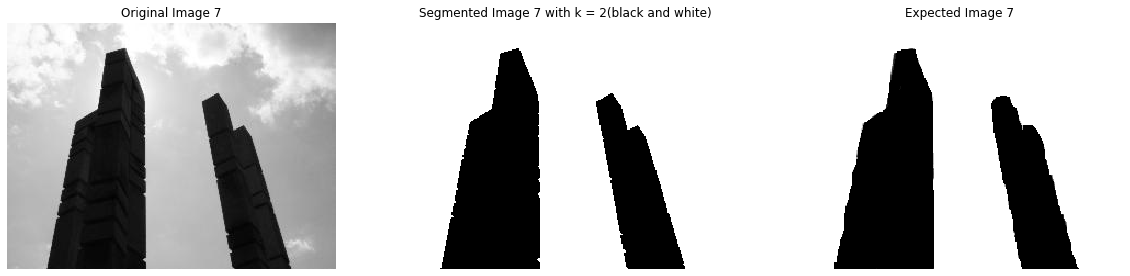

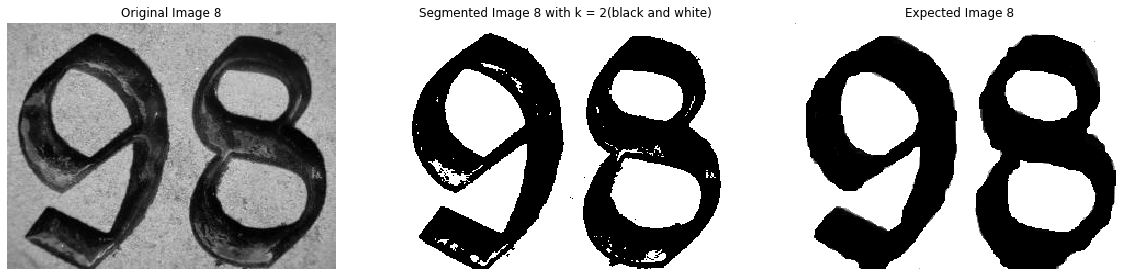

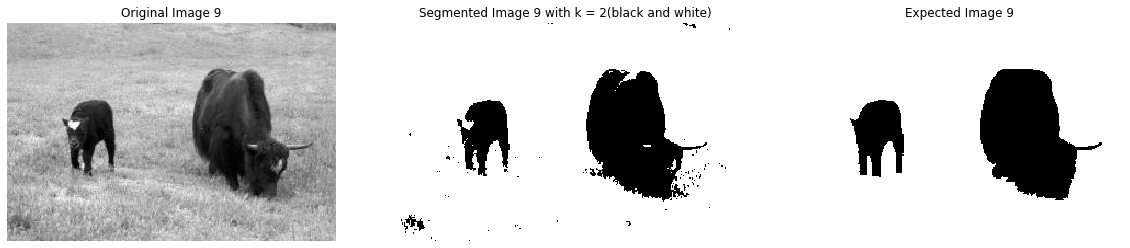

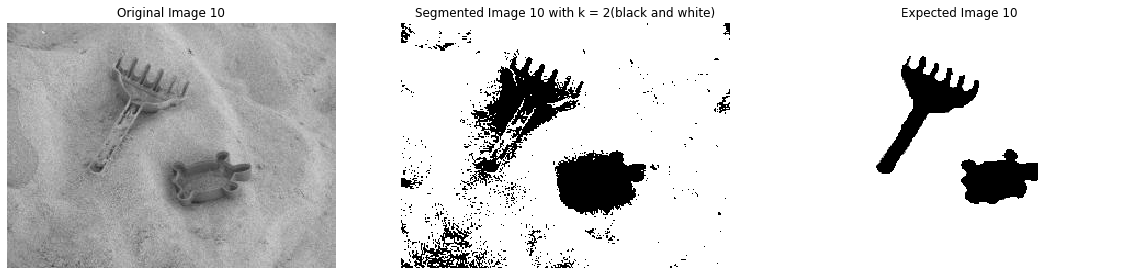

In [364]:
folderpath = "Datasets/images/2objets"
labels_folderpath = "Datasets/verite_terrain/2objets"

image_list = get_images_from_folder(folderpath)
expected_images = get_images_from_folder(labels_folderpath)

nclusters = 2
attempts = 10
segmented_images_list = [segment_image_with_knn(image, nclusters, attempts) for image in image_list]

show_images(image_list, segmented_images_list, expected_images)

In [365]:
res = get_accuracy(segmented_images_list, expected_images)
print("Overall accuracy :" , res)

Accuracy of image segmentation 1 :  0.9265816326530613
Accuracy of image segmentation 2 :  0.9507555555555556
Accuracy of image segmentation 3 :  0.7626271186440678
Accuracy of image segmentation 4 :  0.6932888888888888
Accuracy of image segmentation 6 :  0.2374757281553398
Accuracy of image segmentation 7 :  0.9705777777777778
Accuracy of image segmentation 8 :  0.7783555555555556
Accuracy of image segmentation 9 :  0.9473869346733669
Accuracy of image segmentation 10 :  0.7003571428571429
Overall accuracy : 0.7741562594178618


## Dataset Cellules

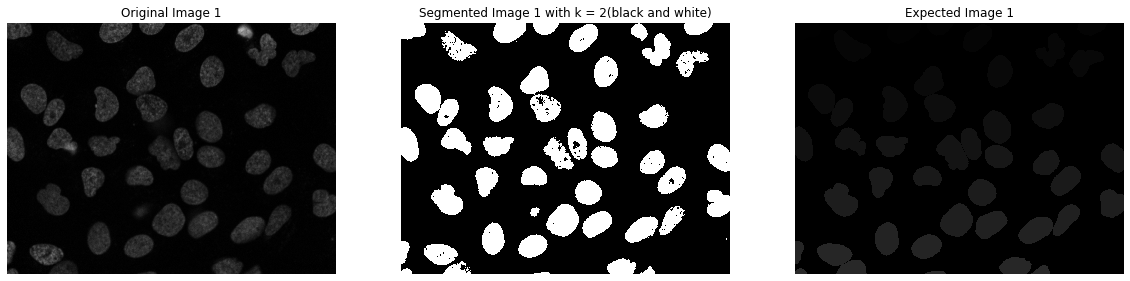

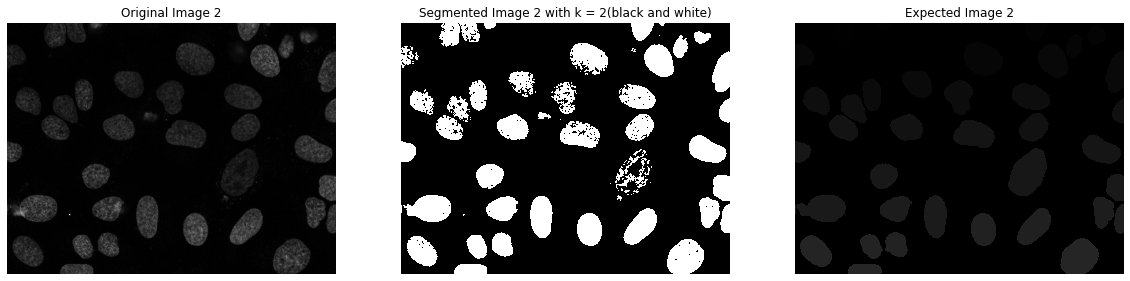

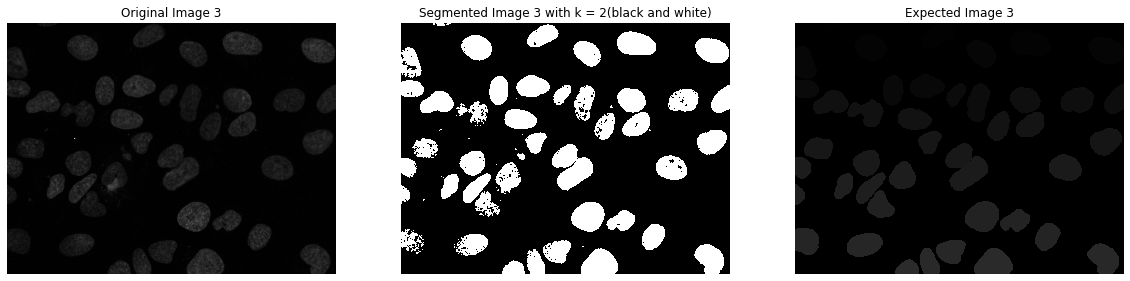

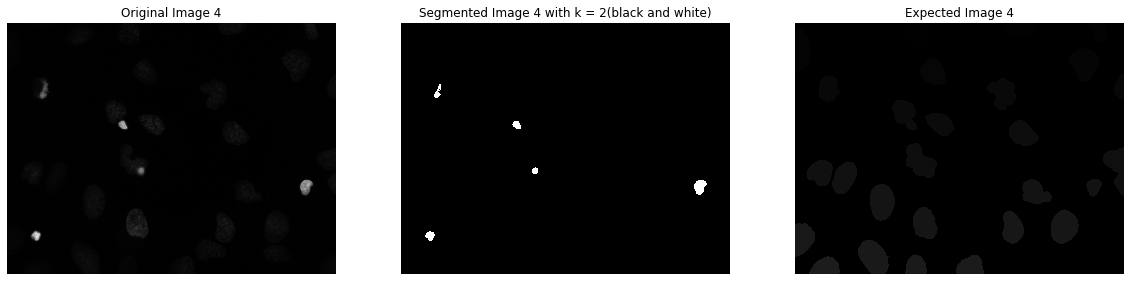

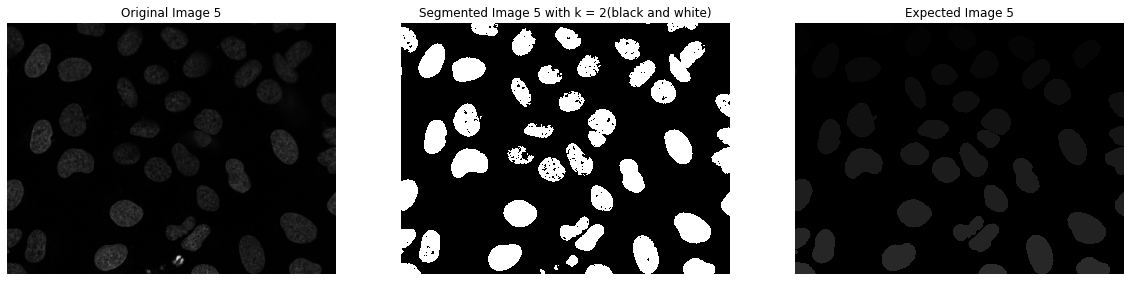

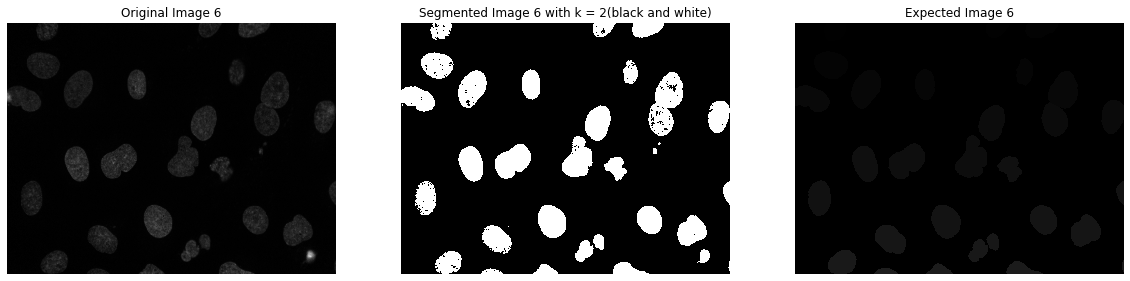

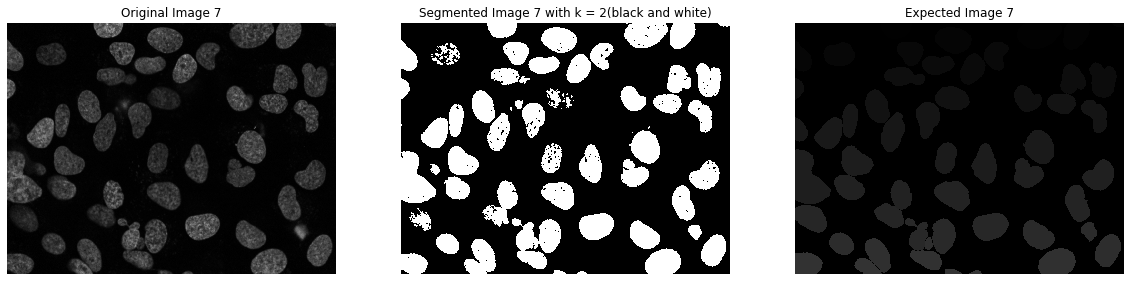

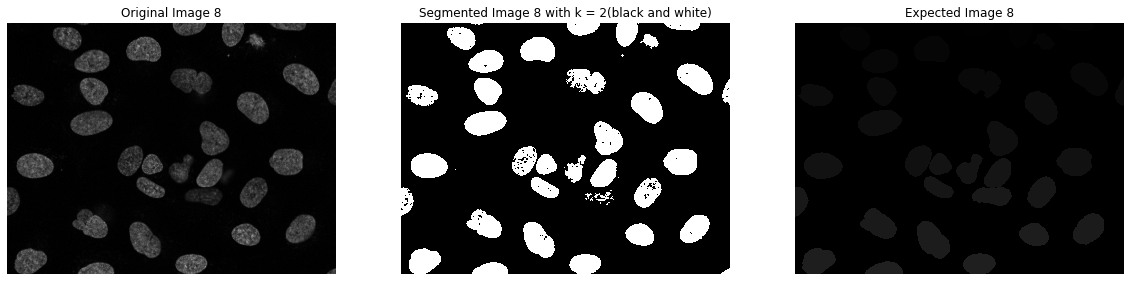

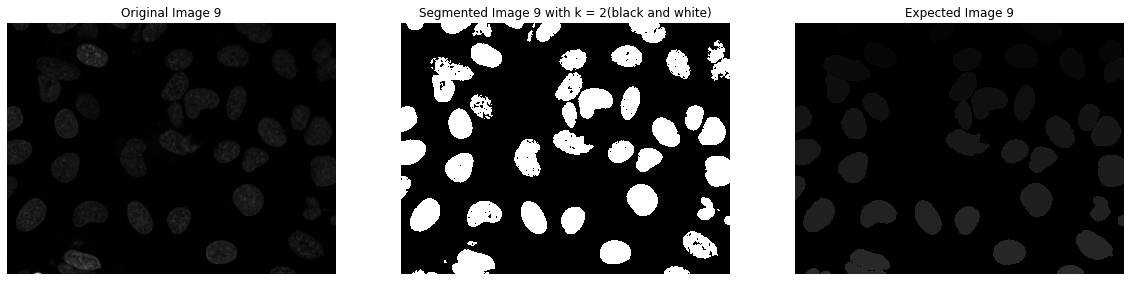

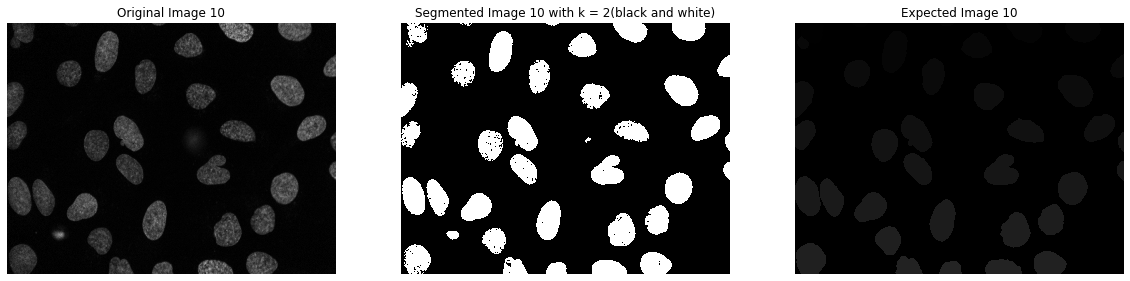

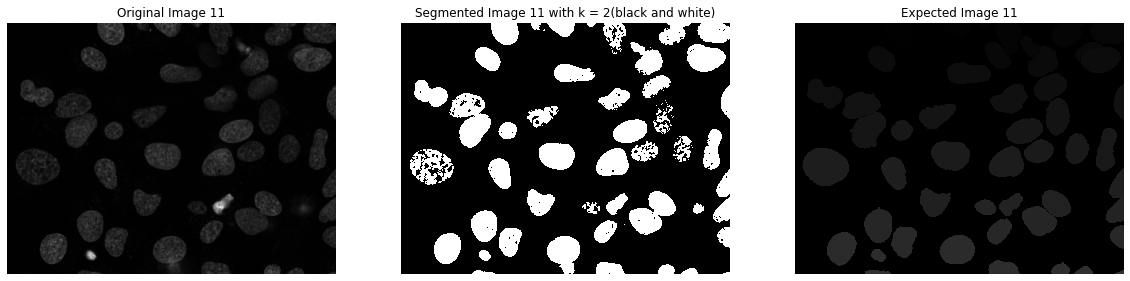

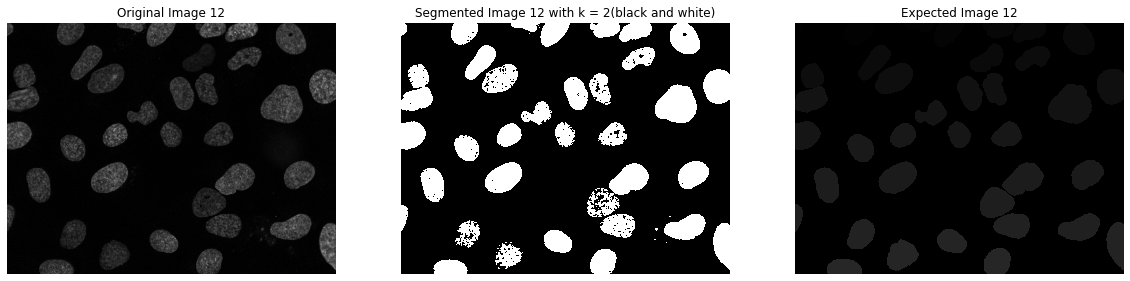

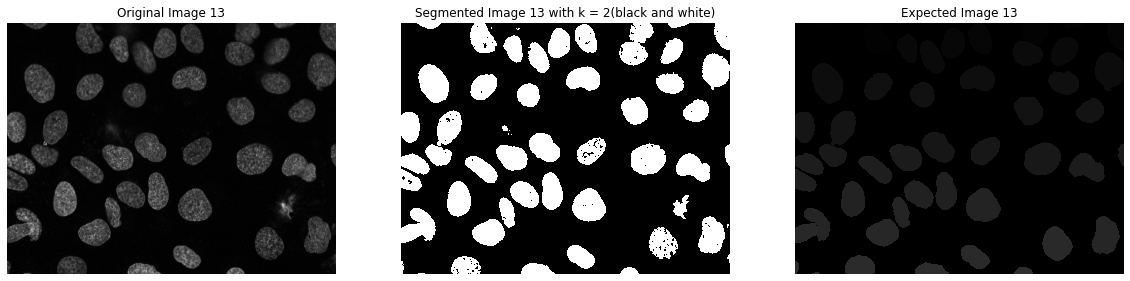

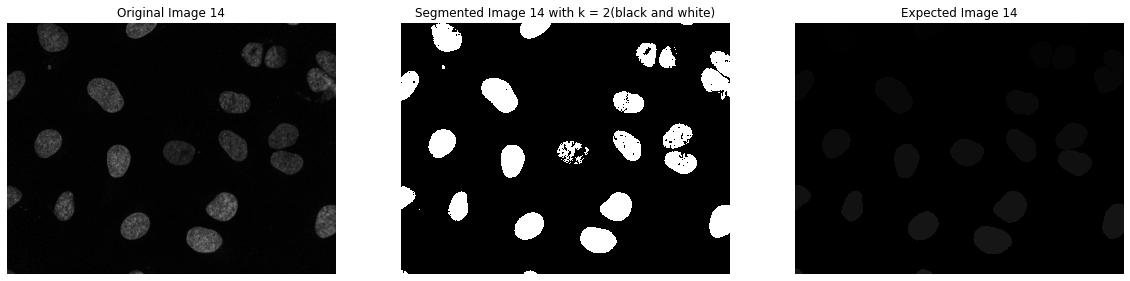

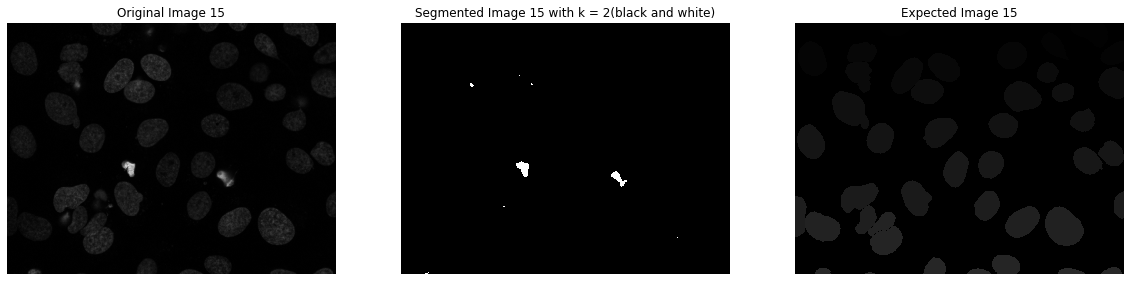

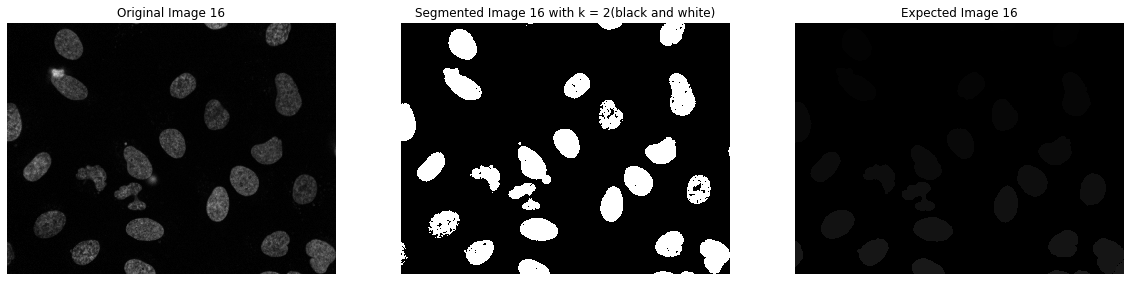

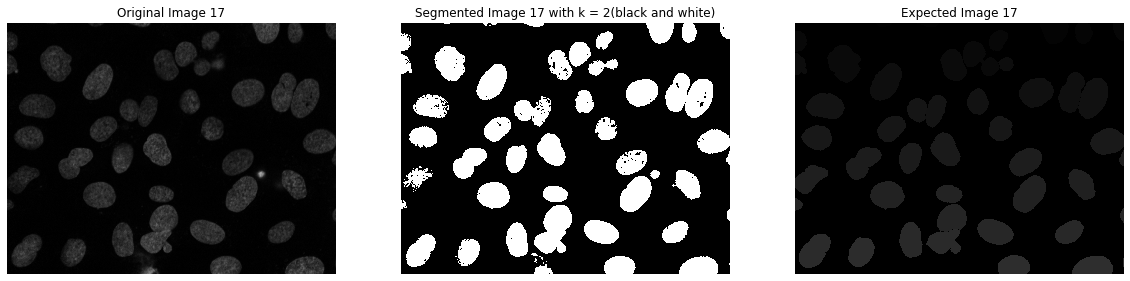

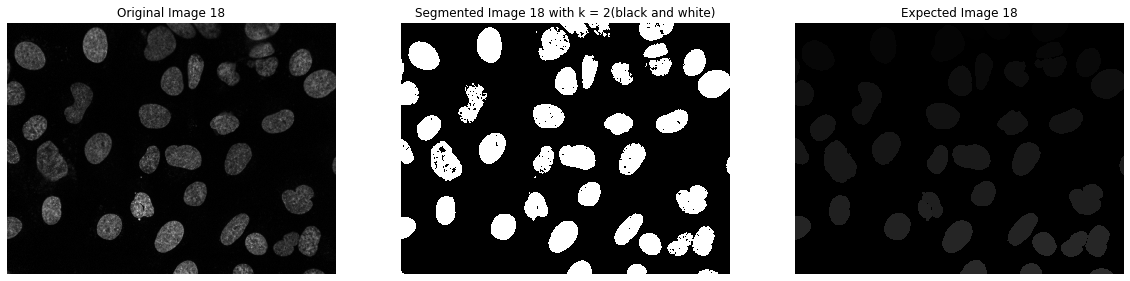

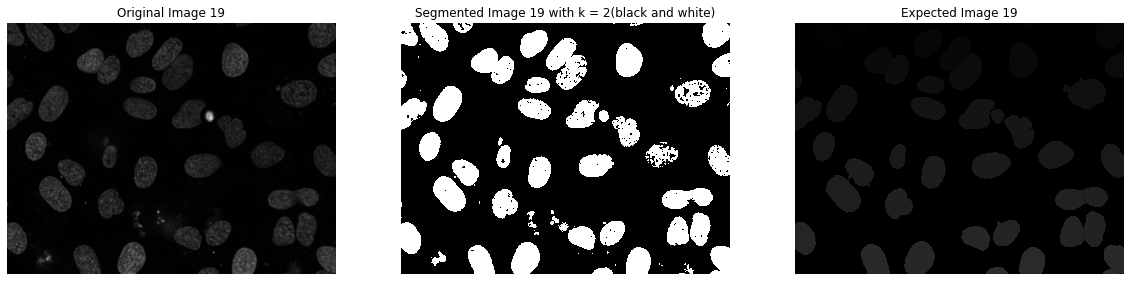

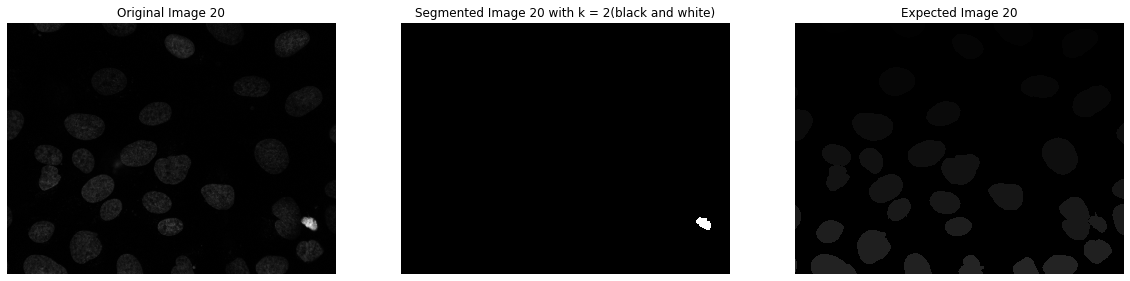

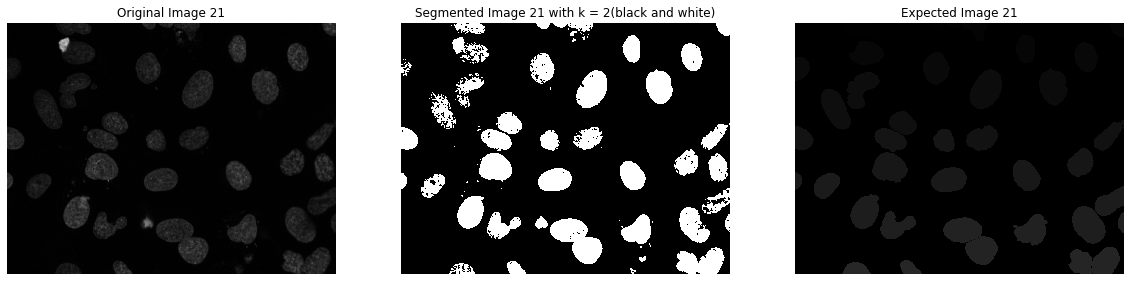

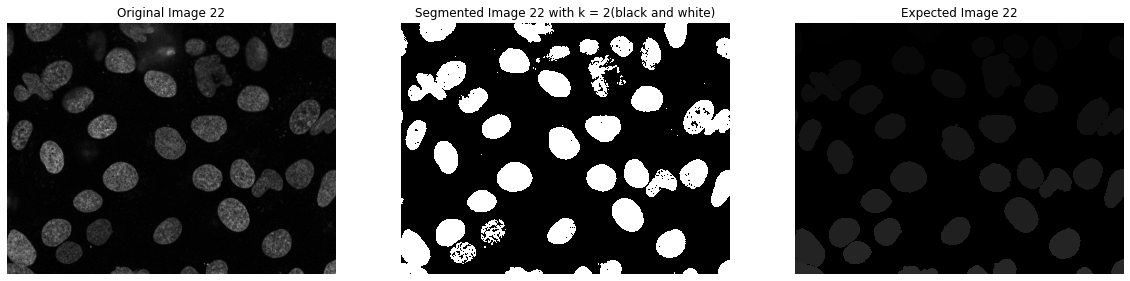

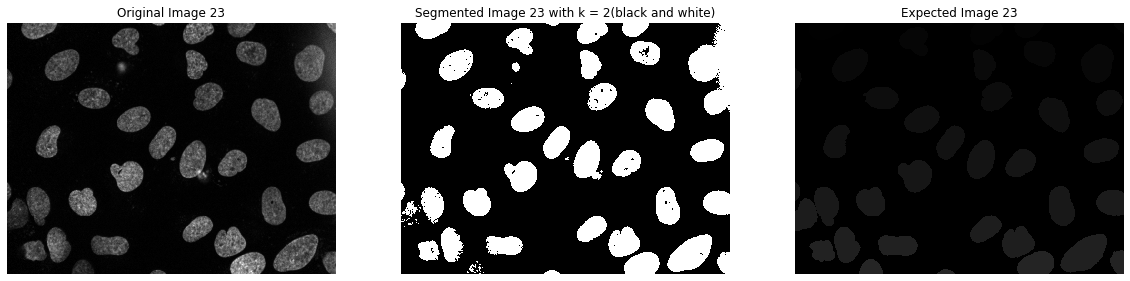

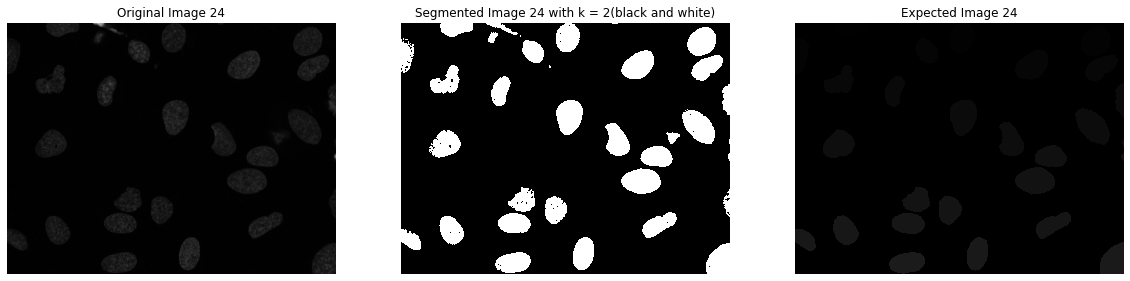

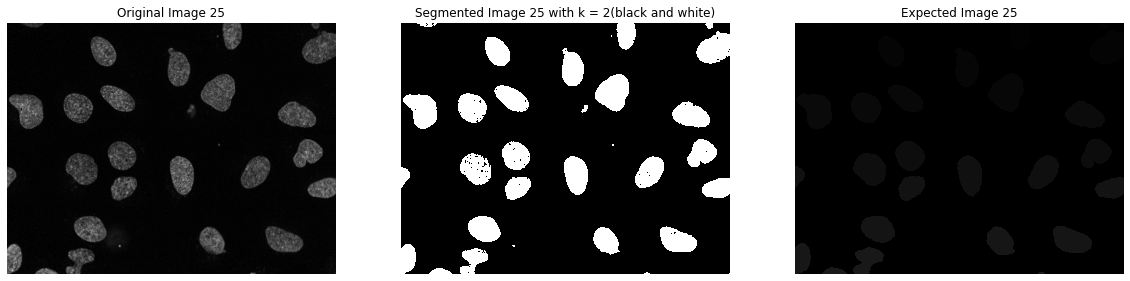

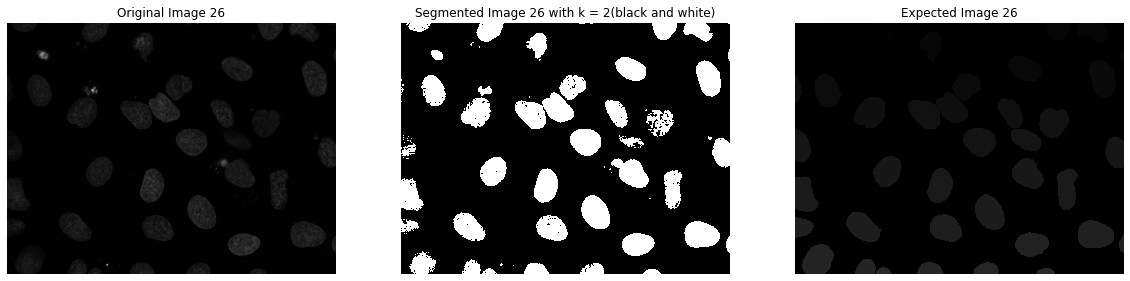

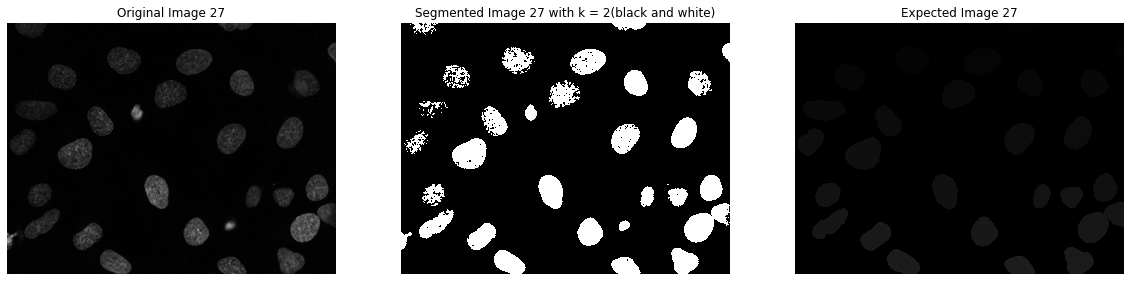

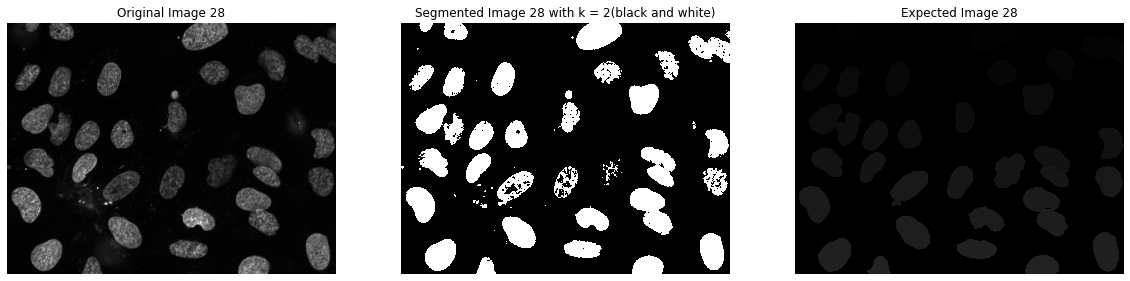

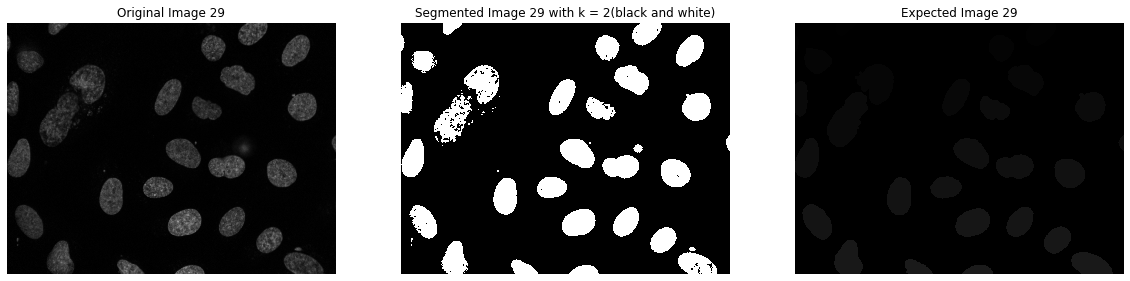

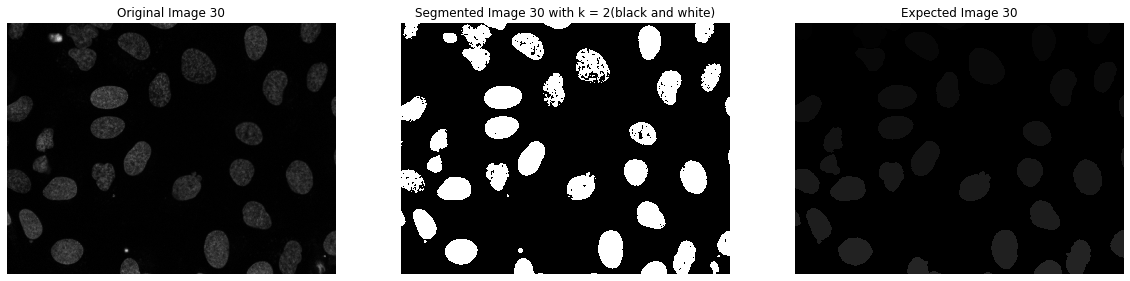

In [368]:
folderpath = "Datasets/images/cellules"
labels_folderpath = "Datasets/verite_terrain/Cellules"

image_list = get_images_from_folder(folderpath)
expected_images = get_images_from_folder(labels_folderpath)

nclusters = 2
attempts = 10
segmented_images_list = [segment_image_with_knn(image, nclusters, attempts) for image in image_list]

show_images(image_list, segmented_images_list, expected_images)

In [369]:
res = get_accuracy(segmented_images_list, expected_images)
print("Overall accuracy :" , res)

Accuracy of image segmentation 1 :  0.18518068040331925
Accuracy of image segmentation 2 :  0.2037683433251527
Accuracy of image segmentation 3 :  0.1554024196276278
Accuracy of image segmentation 4 :  0.4999165149301532
Accuracy of image segmentation 5 :  0.18677625281582189
Accuracy of image segmentation 6 :  0.4544912808480932
Accuracy of image segmentation 7 :  -0.042867424269685594
Accuracy of image segmentation 8 :  0.320601380382448
Accuracy of image segmentation 9 :  0.15281582186013376
Accuracy of image segmentation 10 :  0.29432301525041926
Accuracy of image segmentation 11 :  0.050278163616342963
Accuracy of image segmentation 12 :  0.18617170575831077
Accuracy of image segmentation 13 :  0.09655192267555257
Accuracy of image segmentation 14 :  0.5308261423420442
Accuracy of image segmentation 15 :  0.16402153339042946
Accuracy of image segmentation 16 :  0.45837333659596824
Accuracy of image segmentation 17 :  0.14759728529583227
Accuracy of image segmentation 18 :  0.22360

## Dataset textfort

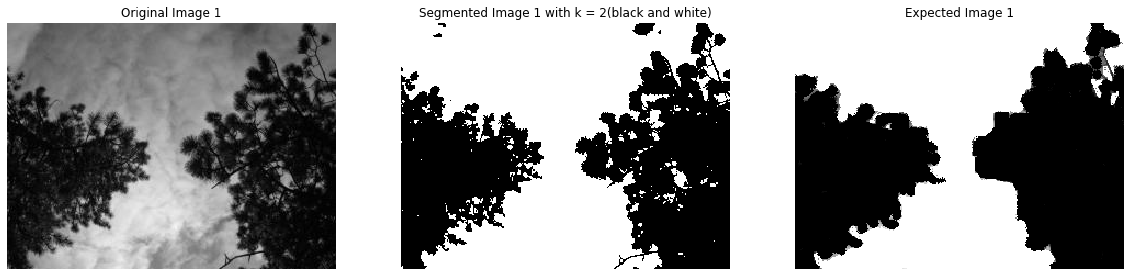

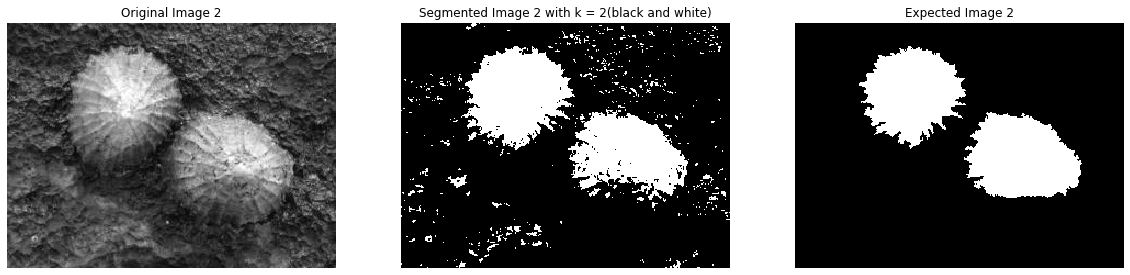

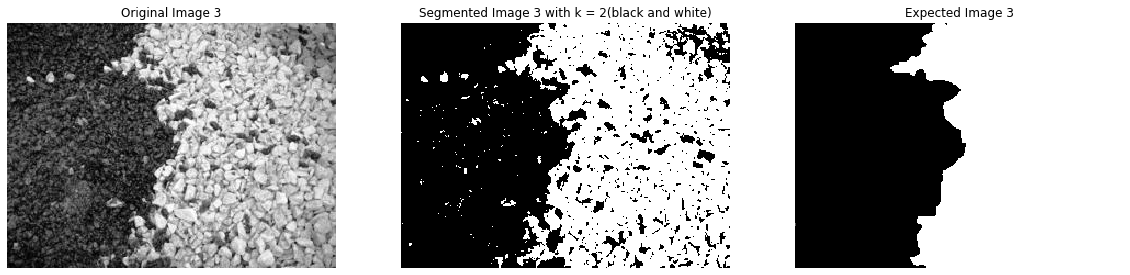

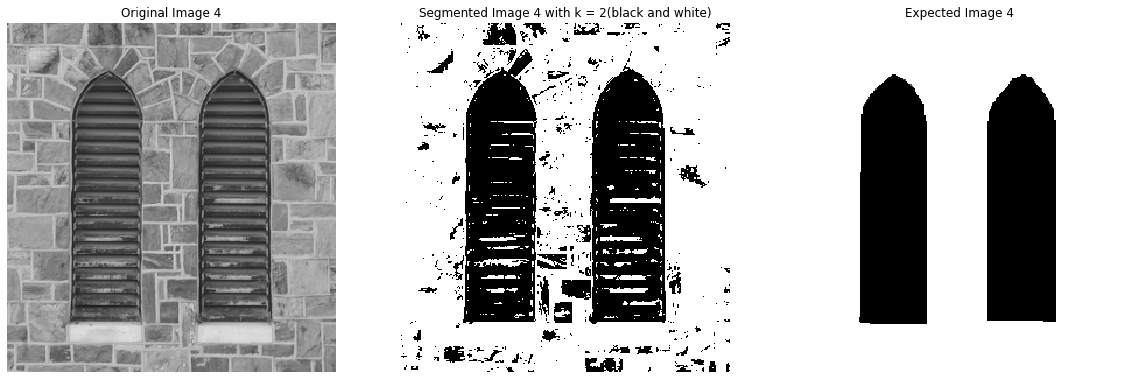

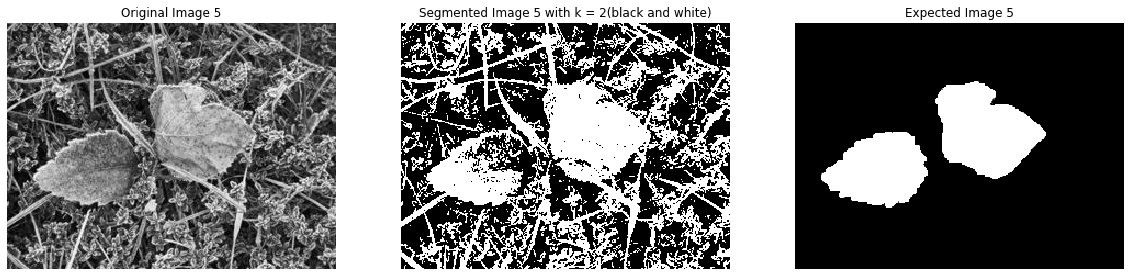

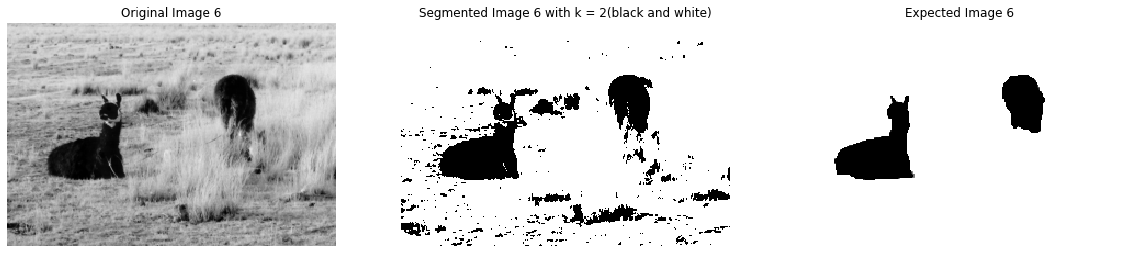

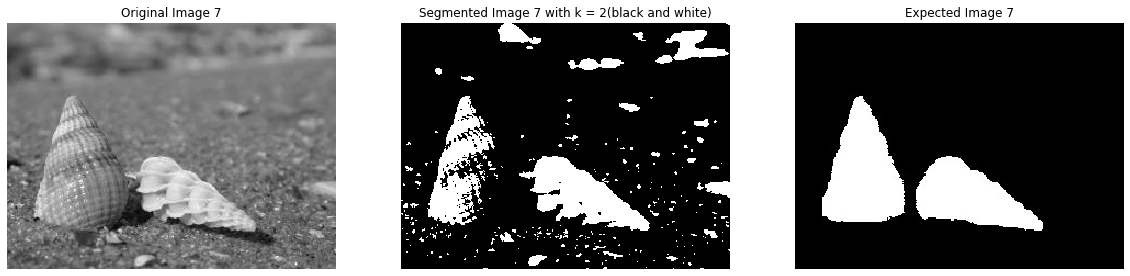

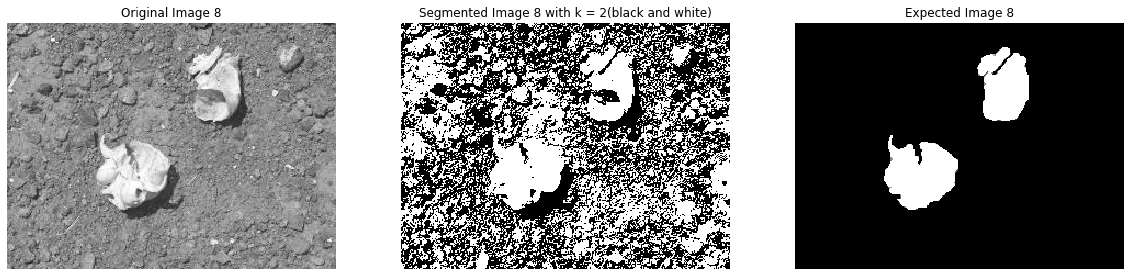

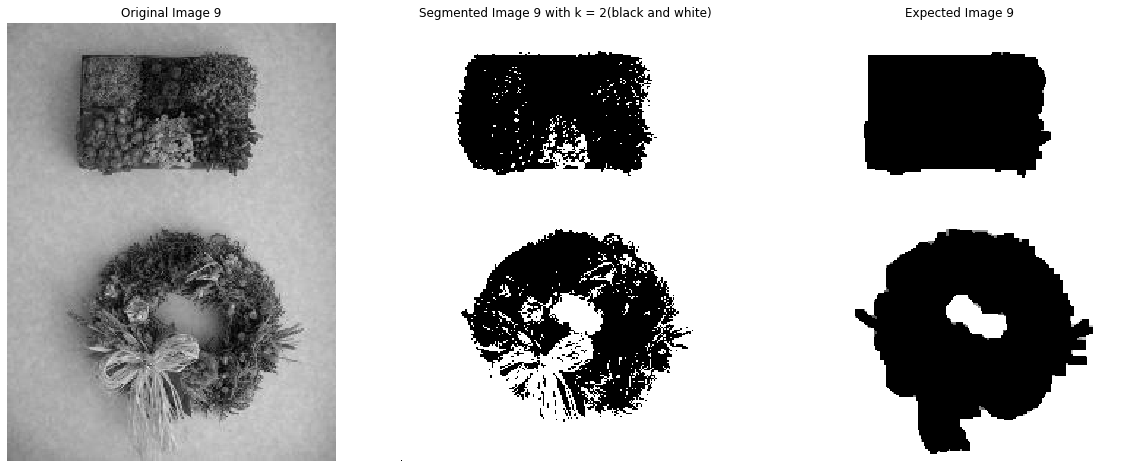

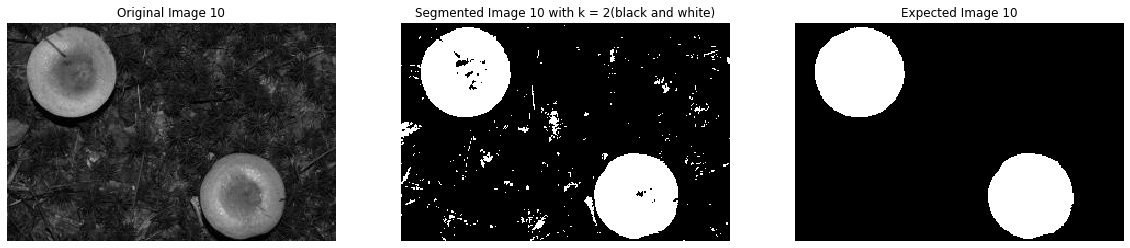

In [370]:
folderpath = "Datasets/images/textfort"
labels_folderpath = "Datasets/verite_terrain/textfort"

image_list = get_images_from_folder(folderpath)
expected_images = get_images_from_folder(labels_folderpath)

nclusters = 2
attempts = 10
segmented_images_list = [segment_image_with_knn(image, nclusters, attempts) for image in image_list]

show_images(image_list, segmented_images_list, expected_images)

In [371]:
res = get_accuracy(segmented_images_list, expected_images)
print("Overall accuracy :" , res)

Accuracy of image segmentation 1 :  0.7406666666666666
Accuracy of image segmentation 2 :  0.8546428571428571
Accuracy of image segmentation 3 :  0.6833482142857144
Accuracy of image segmentation 4 :  0.6587943262411348
Accuracy of image segmentation 5 :  -0.010222222222222133
Accuracy of image segmentation 6 :  0.7966176470588235
Accuracy of image segmentation 7 :  0.6168888888888888
Accuracy of image segmentation 8 :  -0.3156444444444444
Accuracy of image segmentation 9 :  0.6969777777777777
Accuracy of image segmentation 10 :  0.9123115577889447
Overall accuracy : 0.5634381269184141
